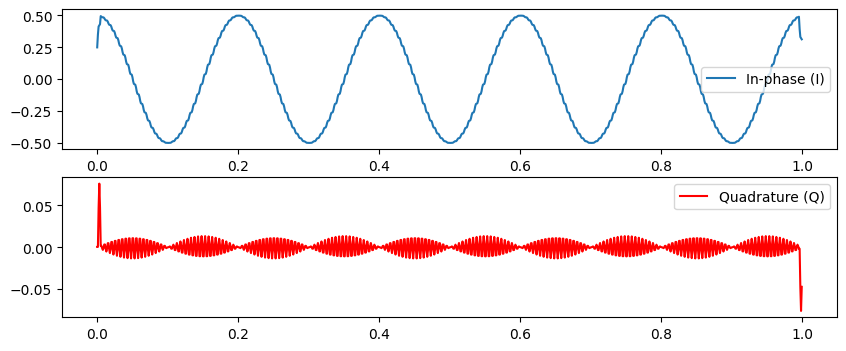

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency (Hz)
fc = 100   # Carrier frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector

# Example modulated signal (AM for simplicity)
signal = np.cos(2 * np.pi * 5 * t) * np.cos(2 * np.pi * fc * t)

# Reference carrier signals
I_ref = np.cos(2 * np.pi * fc * t)  # In-phase reference
Q_ref = np.sin(2 * np.pi * fc * t)  # Quadrature reference

# Mix to obtain I and Q components
I = signal * I_ref
Q = signal * Q_ref

# Low-pass filtering (simple moving average for demonstration)
def low_pass_filter(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

I_filtered = low_pass_filter(I)
Q_filtered = low_pass_filter(Q)

# Plot results
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, I_filtered, label="In-phase (I)")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, Q_filtered, label="Quadrature (Q)", color='r')
plt.legend()
plt.show()


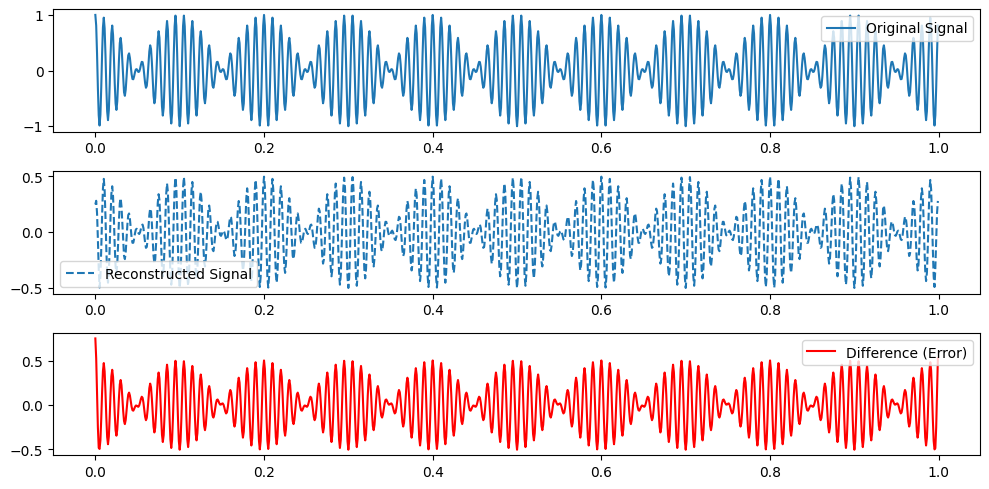

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency (Hz)
fc = 100   # Carrier frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector

# Example modulated signal (a baseband sine wave modulated onto the carrier)
original_signal = np.cos(2 * np.pi * 5 * t) * np.cos(2 * np.pi * fc * t)

# Reference carrier signals
I_ref = np.cos(2 * np.pi * fc * t)  # In-phase reference
Q_ref = np.sin(2 * np.pi * fc * t)  # Quadrature reference

# Generate I and Q components
I = original_signal * I_ref
Q = original_signal * Q_ref

# Low-pass filtering (to remove high-frequency components)
def low_pass_filter(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

I_filtered = low_pass_filter(I)
Q_filtered = low_pass_filter(Q)

# Reconstruct the signal
reconstructed_signal = I_filtered * I_ref + Q_filtered * Q_ref

# Plot results
plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.plot(t, original_signal, label="Original Signal")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, reconstructed_signal, label="Reconstructed Signal", linestyle="dashed")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, original_signal - reconstructed_signal, label="Difference (Error)", color='r')
plt.legend()

plt.tight_layout()
plt.show()
